In [ ]:
!pip install ucimlrepo

In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 3.4 MB/s eta 0:00:00


In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd;
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_breast_cancer
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import label_binarize,StandardScaler
from hmmlearn.hmm import GaussianHMM, MultinomialHMM
import seaborn as sms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,roc_curve, auc;
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16, InceptionV3
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:


# fetch dataset
ionosphere = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = ionosphere.data.features
y = ionosphere.data.targets
print(np.array(X))
col_min = X.min(axis=0)
col_max = X.max(axis=0)
print("Min per attribute:", col_min)
print("Max per attribute:", col_max)
# Encode target variable 'y'
le = LabelEncoder()
y['Class'] = le.fit_transform(y['Class'])
bins=[];
t=-1.0;
while t<=1.0:
  bins.append(t);
  t=t+0.001
print(bins)



[[ 1.       0.       0.99539 ... -0.54487  0.18641 -0.453  ]
 [ 1.       0.       1.      ... -0.06288 -0.13738 -0.02447]
 [ 1.       0.       1.      ... -0.2418   0.56045 -0.38238]
 ...
 [ 1.       0.       0.94701 ...  0.00442  0.92697 -0.00577]
 [ 1.       0.       0.90608 ... -0.03757  0.87403 -0.16243]
 [ 1.       0.       0.8471  ... -0.06678  0.85764 -0.06151]]
Min per attribute: Attribute1     0.0
Attribute2     0.0
Attribute3    -1.0
Attribute4    -1.0
Attribute5    -1.0
Attribute6    -1.0
Attribute7    -1.0
Attribute8    -1.0
Attribute9    -1.0
Attribute10   -1.0
Attribute11   -1.0
Attribute12   -1.0
Attribute13   -1.0
Attribute14   -1.0
Attribute15   -1.0
Attribute16   -1.0
Attribute17   -1.0
Attribute18   -1.0
Attribute19   -1.0
Attribute20   -1.0
Attribute21   -1.0
Attribute22   -1.0
Attribute23   -1.0
Attribute24   -1.0
Attribute25   -1.0
Attribute26   -1.0
Attribute27   -1.0
Attribute28   -1.0
Attribute29   -1.0
Attribute30   -1.0
Attribute31   -1.0
Attribute32   -1.0
A

/tmp/ipython-input-3708035802.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class'] = le.fit_transform(y['Class'])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
classifier=hmm.GaussianHMM(n_components=2,covariance_type="full",n_iter=1000);

In [ ]:
def solvehmm(testsize,X,y,arr,acc_score):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testsize, random_state = 0)
  # sc = StandardScaler()
  # X_train = sc.fit_transform(X_train)
  # X_test = sc.transform(X_test)
  classifier = hmm.GaussianHMM(n_components=3,covariance_type='full',n_iter=1000, random_state=0);
  classifier.fit(X_train)
  y_pred = classifier.predict(X_test)
  y_score = classifier.predict_proba(X_test)
  print("\n")
  print("Test size",testsize);
  sms.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d');
  plt.show();
  print("accuracy_score",accuracy_score(y_test, y_pred))
  arr.append(testsize/100);
  acc_score.append(accuracy_score(y_test,y_pred));
  print("precision_score",precision_score(y_test,y_pred,average='macro'))
  print("recall_score",recall_score(y_test,y_pred,average='macro'))
  print("f1_score",f1_score(y_test, y_pred, average='macro'))
  classes = np.unique(y)
  y_test_bin = label_binarize(y_test, classes=classes)
  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(8, 6))

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')  # random line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multiclass ROC Curve')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()



Test size 20


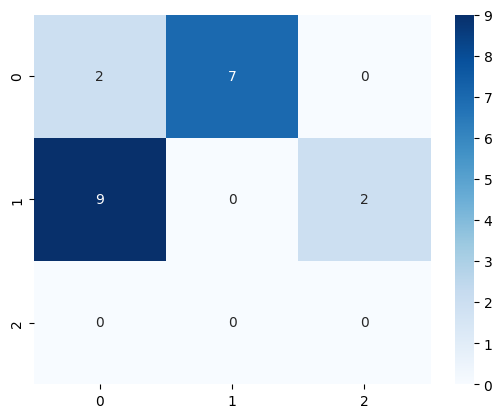

accuracy_score 0.1
precision_score 0.06060606060606061
recall_score 0.07407407407407407
f1_score 0.06666666666666667


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


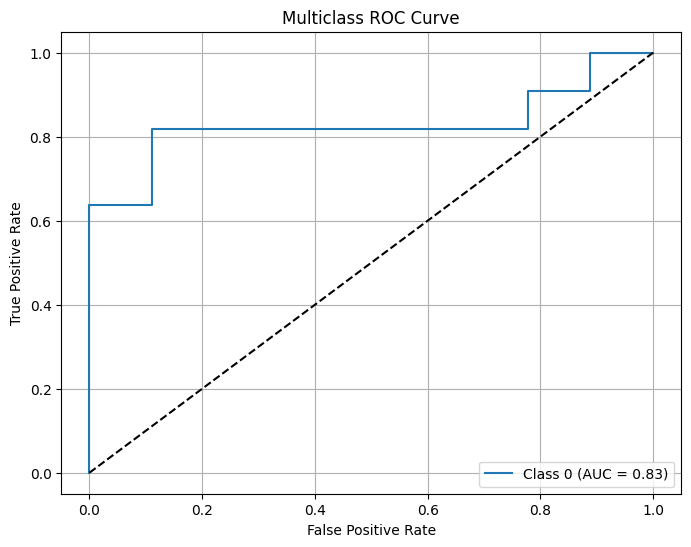



Test size 30


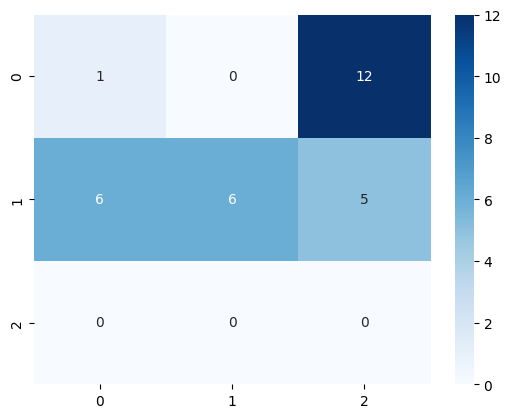

accuracy_score 0.23333333333333334
precision_score 0.38095238095238093
recall_score 0.14328808446455507
f1_score 0.2072463768115942


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


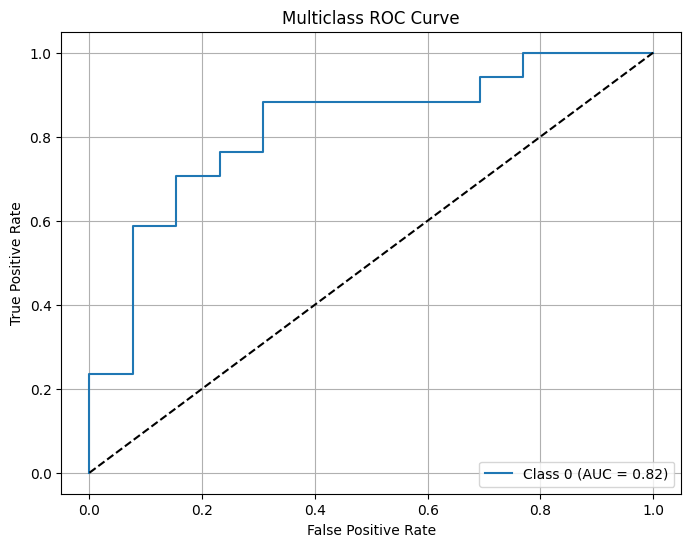



Test size 40


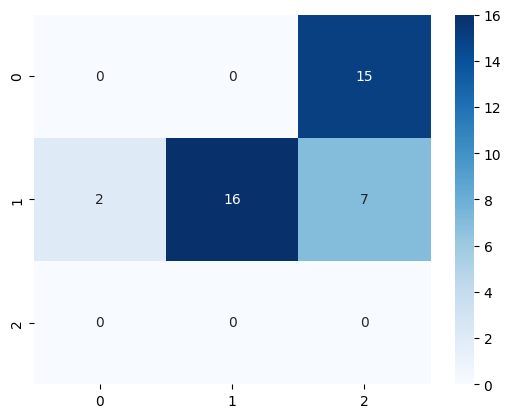

accuracy_score 0.4
precision_score 0.3333333333333333
recall_score 0.21333333333333335
f1_score 0.2601626016260163


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


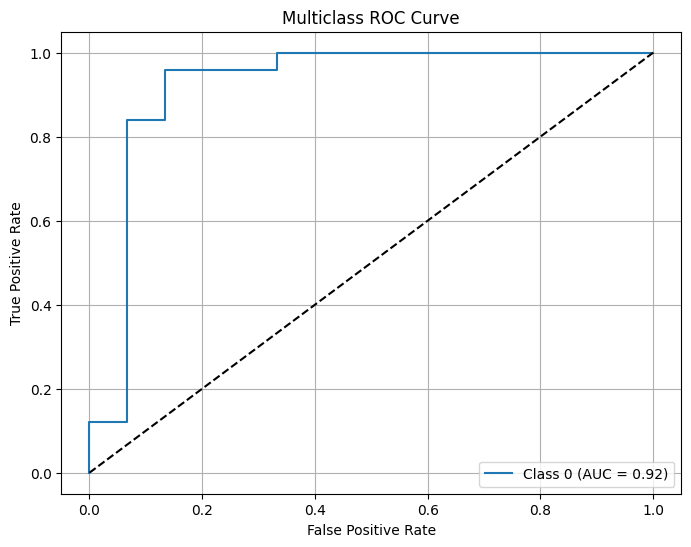



Test size 50


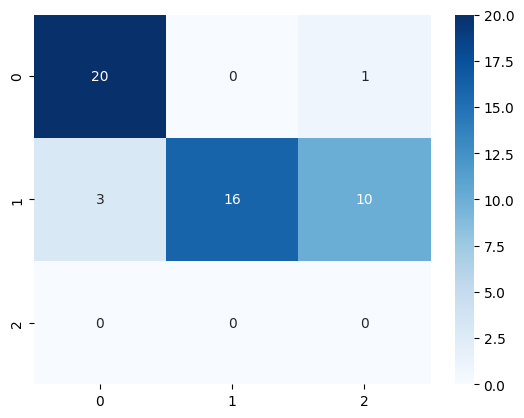

accuracy_score 0.72
precision_score 0.6231884057971014
recall_score 0.5013683634373289
f1_score 0.54006734006734


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


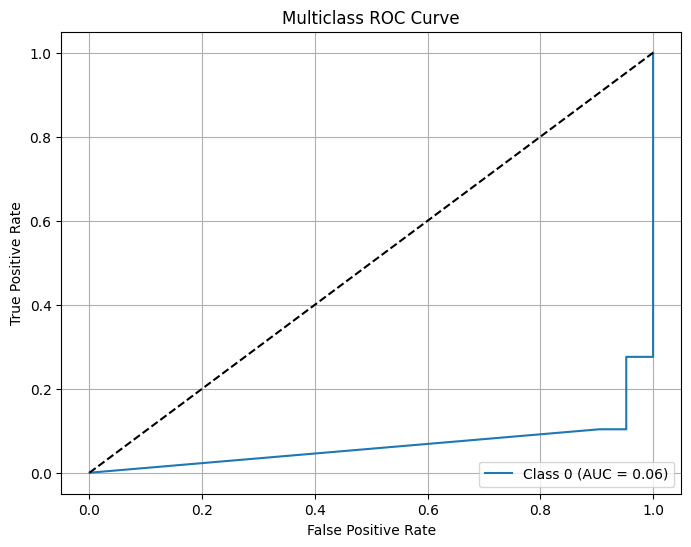

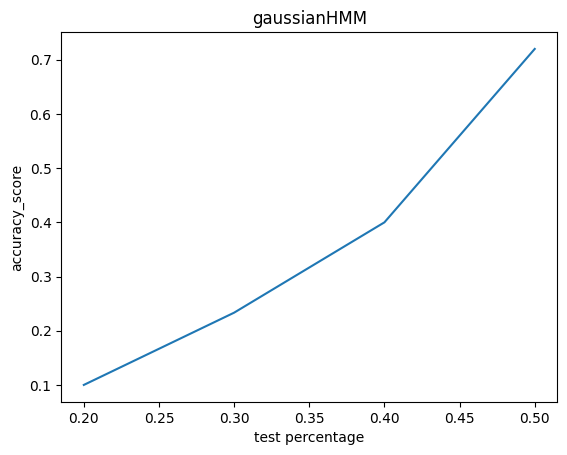

In [ ]:
testsize=[];
acc_score=[];
for i in range (2,6):
  solvehmm(i*10,X,y,testsize,acc_score)

plt.plot(testsize,acc_score);
plt.title('gaussianHMM');
plt.xlabel('test percentage');
plt.ylabel('accuracy_score');

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(X)

# variable information
print(y)
le = LabelEncoder()
y['Diagnosis'] = le.fit_transform(y['Diagnosis'])

     radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0       0.30010          0.14710     0.241

/tmp/ipython-input-3028486517.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'] = le.fit_transform(y['Diagnosis'])


In [ ]:
def solvehmm(testsize,X,y,arr,acc_score):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testsize, random_state = 0)
  # sc = StandardScaler()
  # X_train = sc.fit_transform(X_train)
  # X_test = sc.transform(X_test)
  classifier = hmm.GaussianHMM(n_components=3,covariance_type='tied',n_iter=1000, random_state=0);
  classifier.fit(X_train)
  y_pred = classifier.predict(X_test)
  y_score = classifier.predict_proba(X_test)
  print("\n")
  print("Test size",testsize);
  sms.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d');
  plt.show();
  print("accuracy_score",accuracy_score(y_test, y_pred))
  arr.append(testsize/100);
  acc_score.append(accuracy_score(y_test,y_pred));
  print("precision_score",precision_score(y_test,y_pred,average='macro'))
  print("recall_score",recall_score(y_test,y_pred,average='macro'))
  print("f1_score",f1_score(y_test, y_pred, average='macro'))
  classes = np.unique(y)
  y_test_bin = label_binarize(y_test, classes=classes)
  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(8, 6))

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')  # random line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multiclass ROC Curve')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()



Test size 20


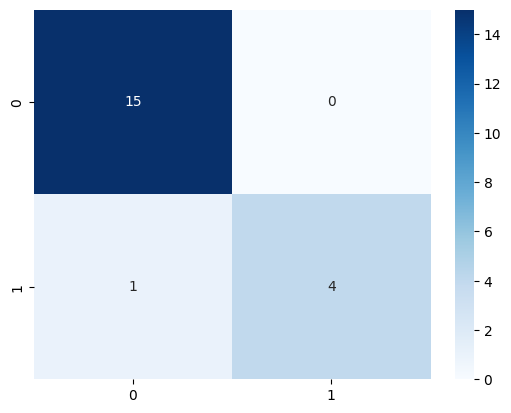

accuracy_score 0.95
precision_score 0.96875
recall_score 0.9
f1_score 0.9283154121863799


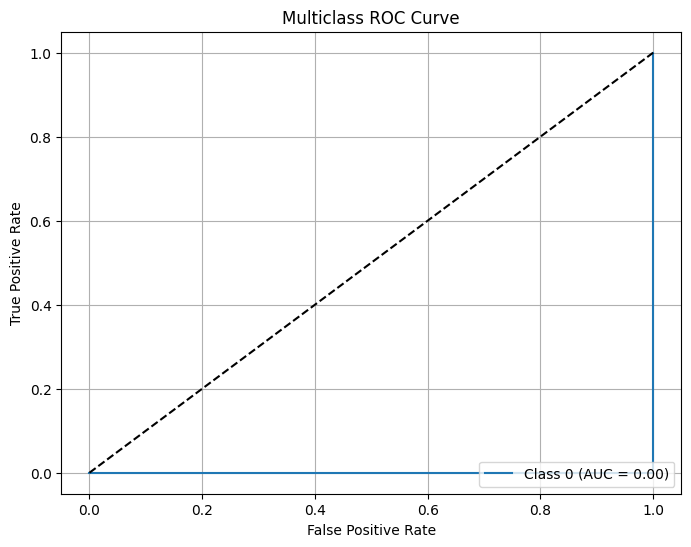



Test size 30


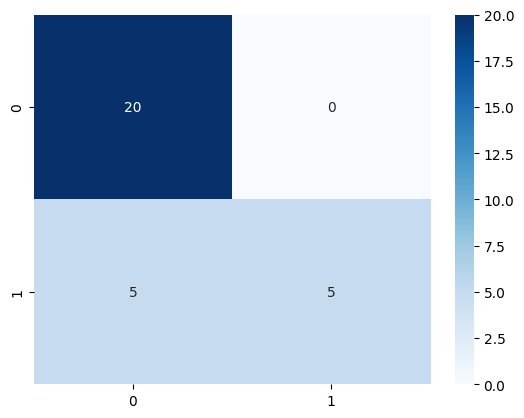

accuracy_score 0.8333333333333334
precision_score 0.9
recall_score 0.75
f1_score 0.7777777777777777


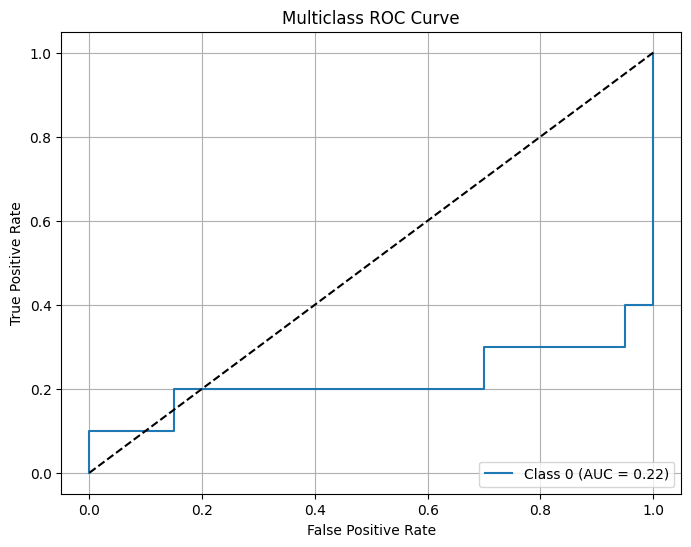



Test size 40


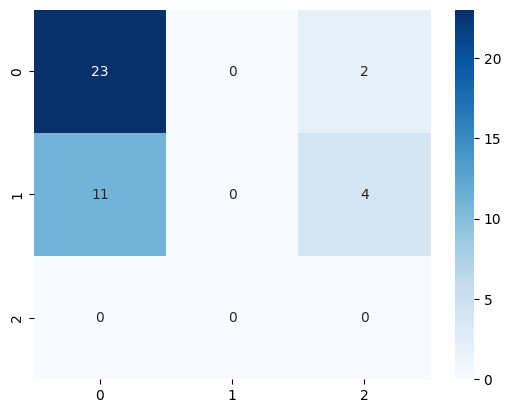

accuracy_score 0.575
precision_score 0.22549019607843138
recall_score 0.3066666666666667
f1_score 0.2598870056497175


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


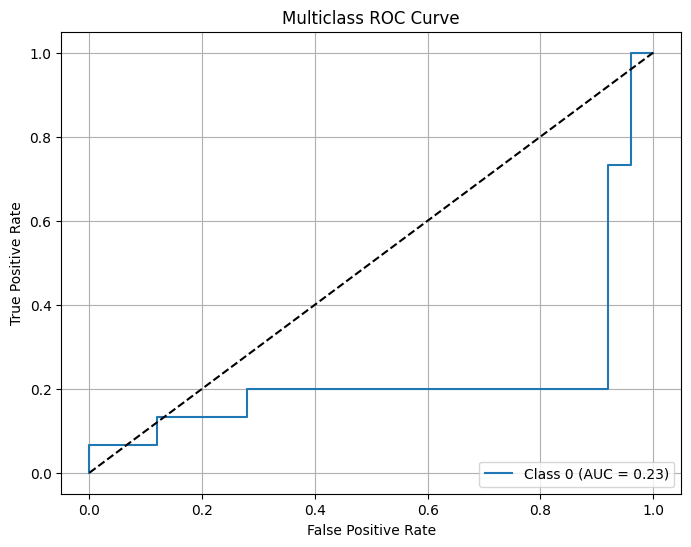



Test size 50


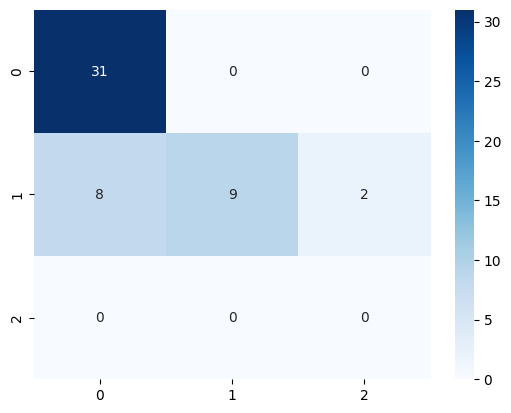

accuracy_score 0.8
precision_score 0.5982905982905983
recall_score 0.49122807017543857
f1_score 0.5095238095238095


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


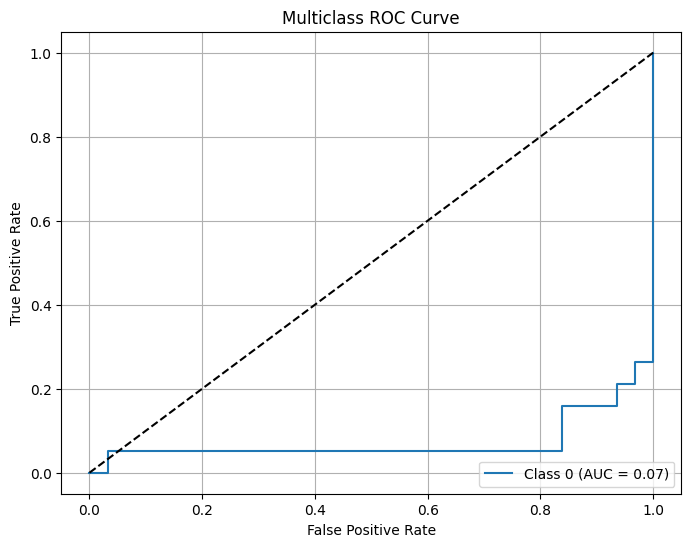

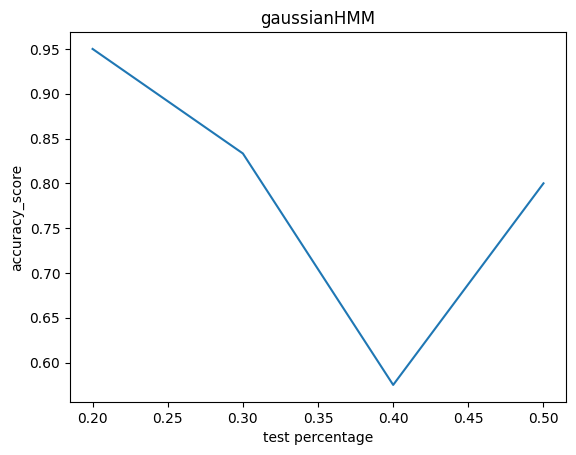

In [ ]:
testsize=[];
acc_score=[];
for i in range (2,6):
  solvehmm(i*10,X,y,testsize,acc_score)

plt.plot(testsize,acc_score);
plt.title('gaussianHMM');
plt.xlabel('test percentage');
plt.ylabel('accuracy_score');

# **Multinomialhmm**

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data"
df = pd.read_csv(url, header=None)
print(df.shape)
df.head()

(351, 35)


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder

# Preprocess data
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode class labels (g=1, b=0)
le = LabelEncoder()
y = le.fit_transform(y)

# Discretize continuous features for MultinomialHMM
kb = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_disc = kb.fit_transform(X).astype(int)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:262: UserWarning: Feature 1 is constant and will be replaced with 0.
  warnings.warn(


In [ ]:
def train_class_hmms(X_train, y_train, n_components=3, n_iter=100, random_state=42):
    models = {}
    for cls in np.unique(y_train):
        X_cls = X_train[y_train == cls]
        model = MultinomialHMM(n_components=n_components, n_iter=n_iter, random_state=random_state)
        model.fit(X_cls)
        models[cls] = model
    return models

def predict_hmms(models, X_test):
    y_pred, scores = [], []
    classes = list(models.keys())
    for seq in X_test:
        seq = seq.reshape(-1, 1)
        log_probs = [models[c].score(seq) for c in classes]
        y_pred.append(classes[np.argmax(log_probs)])
        scores.append(max(log_probs))
    return np.array(y_pred), np.array(scores), classes

In [ ]:
def solvemultinomilhmmiosphere(testsize,X,y,arr,acc_score):
  X_fixed = np.ceil(X_disc).astype(int)
  X_train, X_test, y_train, y_test = train_test_split(
        X_fixed, y, test_size=testsize/X.shape[0], stratify=y, random_state=42
    )
  # sc = StandardScaler()
  # X_train = sc.fit_transform(X_train)
  # X_test = sc.transform(X_test)
  models = {}
  for cls in np.unique(y_train):
        X_cls = X_train[y_train == cls]
        # Reshape as (n_samples, n_features)
        # and wrap each as sequences of length 1 (Multinomial expects 2D array)
        model = MultinomialHMM(n_components=3, n_iter=100, random_state=42)
        model.fit(X_cls)
        models[cls] = model

  y_pred = []
  y_score = [] # Initialize y_score
  classes = list(models.keys())

  for seq in X_test:
        seq = seq.reshape(1, -1)  # fix: each sequence = 1 observation of n_features
        log_probs = [models[c].score(seq) for c in classes]
        y_pred.append(classes[np.argmax(log_probs)])
        y_score.append([np.exp(models[c].score(seq)) for c in classes]) # Calculate and append probabilities
  y_score = np.array(y_score) # Convert to numpy array

  print("\n")
  print("Test size",testsize);
  sms.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d');
  plt.show();
  print("accuracy_score",accuracy_score(y_test, y_pred))
  arr.append(testsize/100);
  acc_score.append(accuracy_score(y_test,y_pred));
  print("precision_score",precision_score(y_test,y_pred,average='macro'))
  print("recall_score",recall_score(y_test,y_pred,average='macro'))
  print("f1_score",f1_score(y_test, y_pred, average='macro'))
  classes = np.unique(y)
  y_test_bin = label_binarize(y_test, classes=classes)
  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(8, 6))

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')  # random line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multiclass ROC Curve')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340




Test size 20


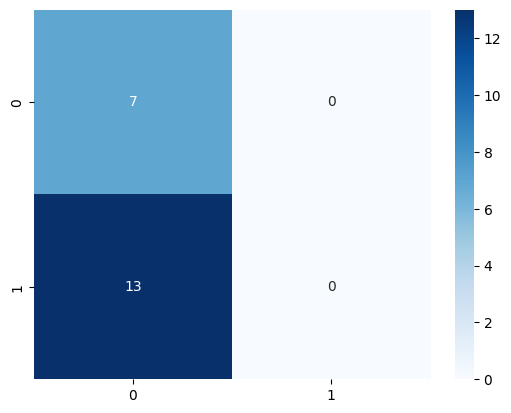

accuracy_score 0.35
precision_score 0.175
recall_score 0.5
f1_score 0.25925925925925924


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


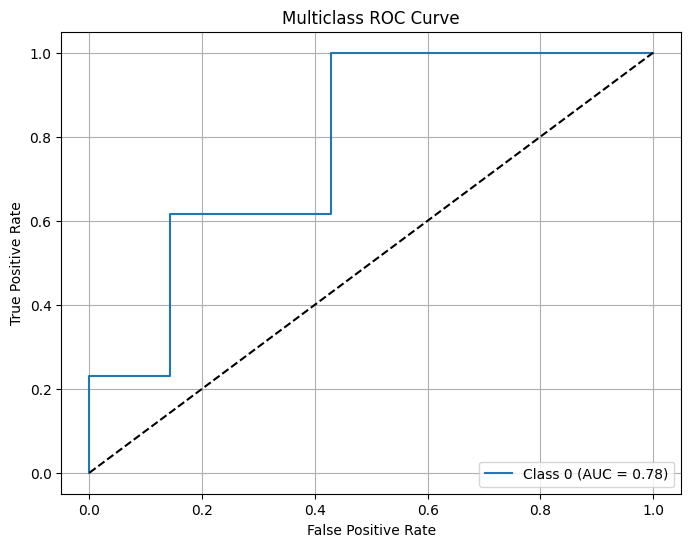

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340




Test size 30


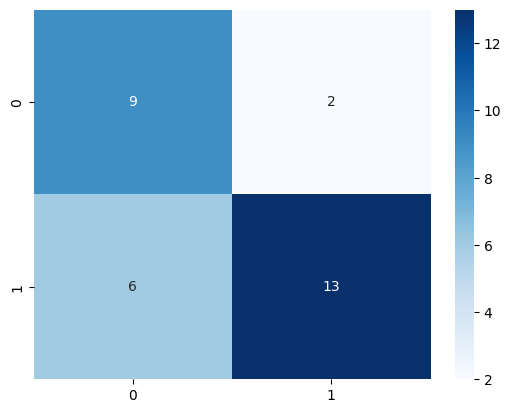

accuracy_score 0.7333333333333333
precision_score 0.7333333333333334
recall_score 0.7511961722488039
f1_score 0.7285067873303167


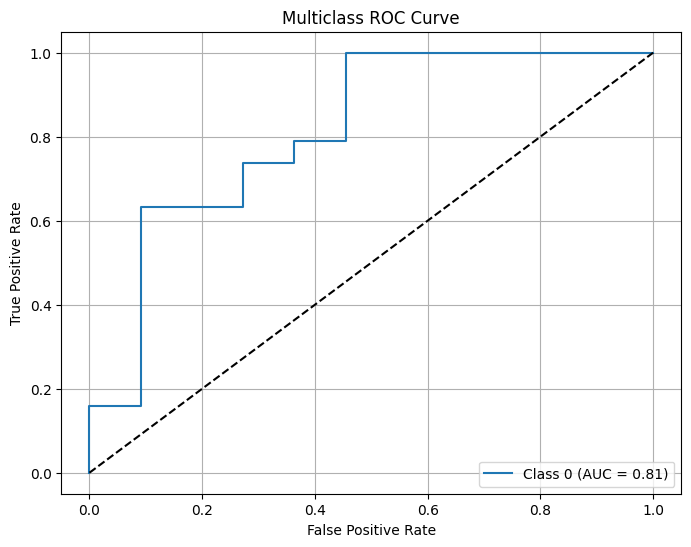

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340




Test size 40


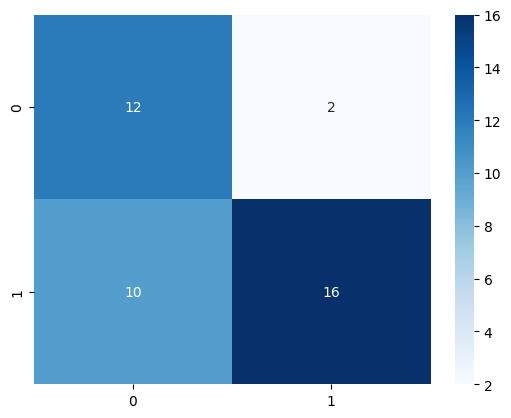

accuracy_score 0.7
precision_score 0.7171717171717171
recall_score 0.7362637362637363
f1_score 0.696969696969697


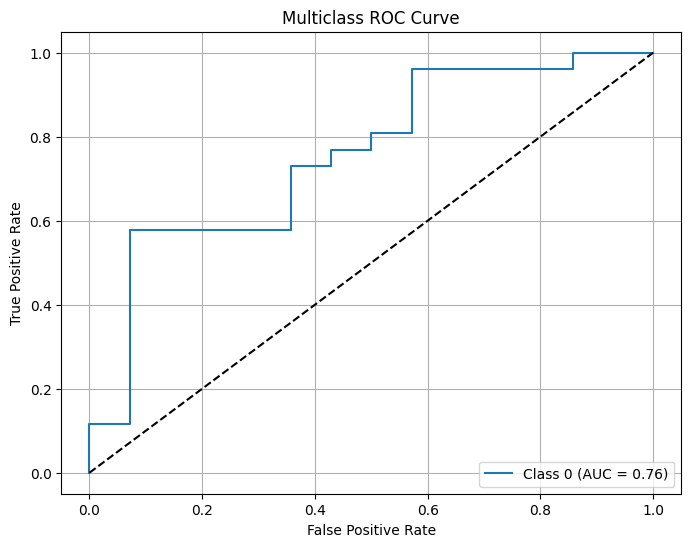

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340




Test size 50


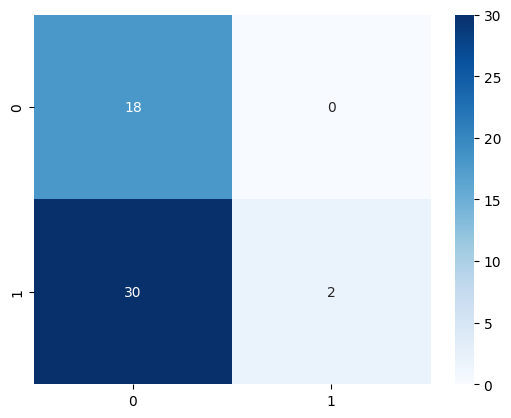

accuracy_score 0.4
precision_score 0.6875
recall_score 0.53125
f1_score 0.3315508021390374


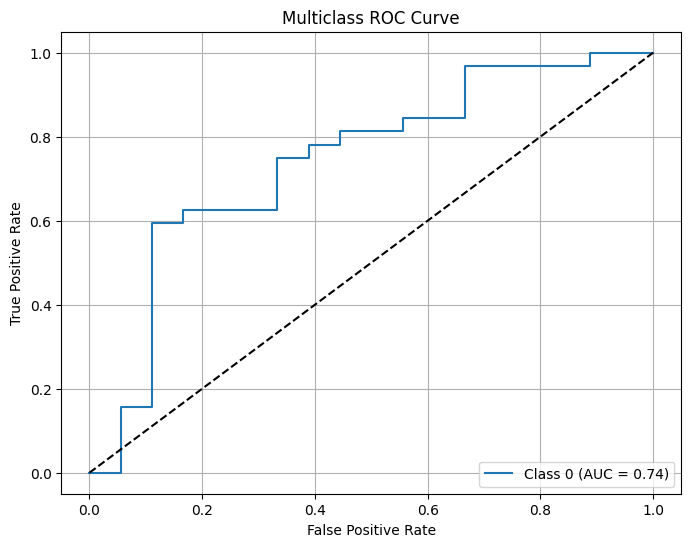

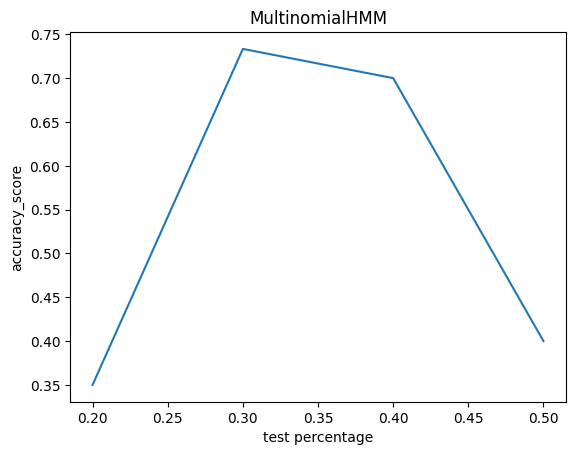

In [ ]:
testsize=[];
acc_score=[];
for i in range (2,6):
  solvemultinomilhmmiosphere(i*10,X,y,testsize,acc_score)

plt.plot(testsize,acc_score);
plt.title('MultinomialHMM');
plt.xlabel('test percentage');
plt.ylabel('accuracy_score');

# **Implementing MultinomialHMM on breast cancer dataset**

In [ ]:
data = load_breast_cancer()
X_raw = data.data
y = data.target  # 0/1 (malignant=0, benign=1)

# Standardize and discretize data for MultinomialHMM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

n_bins = 10  # tune if needed
kbd = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
X_disc = kbd.fit_transform(X_scaled).astype(int)
n_features = X_disc.shape[1]

print("Data ready. Shape:", X_disc.shape)

Data ready. Shape: (569, 30)


In [ ]:
def sample_to_obs(seq_row):
    """
    Convert one sample (discrete feature vector) into a valid observation sequence
    for MultinomialHMM new API.
    Each observation = integer count vector (1 at that feature’s bin index).
    """
    obs = np.zeros((len(seq_row), n_bins), dtype=int)
    for i, val in enumerate(seq_row):
        obs[i, int(val)] = 1
    return obs

def train_class_hmms(X_disc_train, y_train, n_components=3, n_iter=100, random_state=42, verbose=False):
    models = {}
    classes = np.unique(y_train)
    for c in classes:
        Xc = X_disc_train[y_train == c]
        # concatenate all sequences
        obs_concat = np.vstack([sample_to_obs(row) for row in Xc])
        lengths = [n_features] * Xc.shape[0]
        model = MultinomialHMM(n_components=n_components, n_iter=n_iter,
                               random_state=random_state, verbose=verbose, tol=1e-4)
        model.fit(obs_concat, lengths)
        models[c] = model
    return models

def predict_hmms(models, X_disc_test):
    scores = np.zeros((X_disc_test.shape[0], len(models)))
    classes = sorted(models.keys())
    for i, row in enumerate(X_disc_test):
        obs = sample_to_obs(row)
        for j, c in enumerate(classes):
            try:
                scores[i, j] = models[c].score(obs)
            except:
                scores[i, j] = -1e9
    preds = np.array(classes)[np.argmax(scores, axis=1)]
    return preds, scores, classes

def scores_to_prob(scores, classes, positive_class=1):
    exp = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs = exp / exp.sum(axis=1, keepdims=True)
    idx = list(classes).index(positive_class)
    return probs[:, idx]

In [ ]:
def solvemultinomilhmmbreastcancer(testsize,X,y,arr,acc_score):
  X_fixed = np.ceil(X_disc).astype(int)
  X_train, X_test, y_train, y_test = train_test_split(
        X_fixed, y, test_size=testsize/X.shape[0], stratify=y, random_state=42
    )
  # sc = StandardScaler()
  # X_train = sc.fit_transform(X_train)
  # X_test = sc.transform(X_test)
  X_train, X_test, y_train, y_test = train_test_split(X_disc, y, test_size=testsize/X.shape[0],
                                                        stratify=y, random_state=42)
  models = train_class_hmms(X_train, y_train, n_components=3, n_iter=100, random_state=42)
  y_pred, scores, classes = predict_hmms(models, X_test)

  print("\n")
  print("Test size",testsize);
  sms.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d');
  plt.show();
  print("accuracy_score",accuracy_score(y_test, y_pred))
  arr.append(testsize/100);
  acc_score.append(accuracy_score(y_test,y_pred));
  print("precision_score",precision_score(y_test,y_pred,average='macro'))
  print("recall_score",recall_score(y_test,y_pred,average='macro'))
  print("f1_score",f1_score(y_test, y_pred, average='macro'))
  classes = np.unique(y)
  y_test_bin = label_binarize(y_test, classes=classes)
  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(8, 6))

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], scores[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')  # random line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multiclass ROC Curve')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340




Test size 20


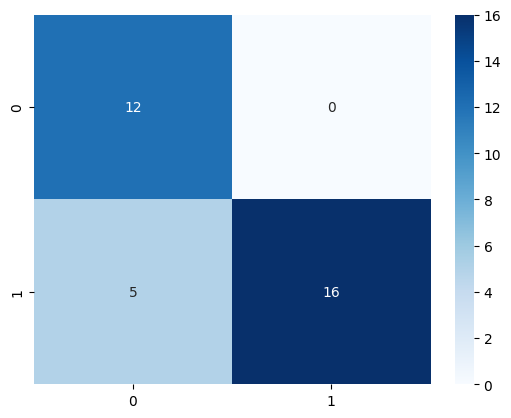

accuracy_score 0.8484848484848485
precision_score 0.8529411764705883
recall_score 0.8809523809523809
f1_score 0.8462255358807083


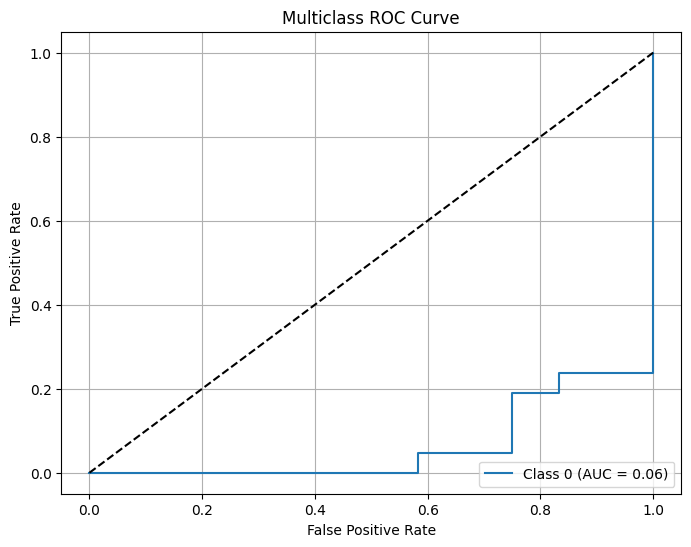

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340




Test size 30


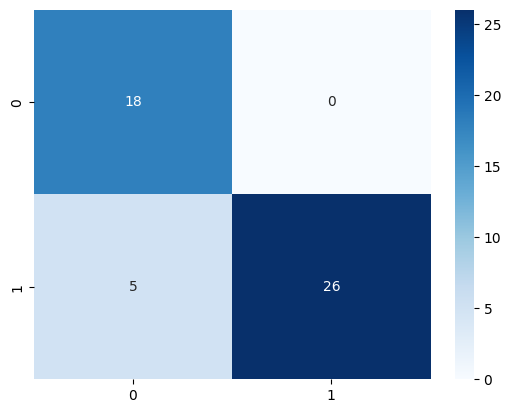

accuracy_score 0.8979591836734694
precision_score 0.8913043478260869
recall_score 0.9193548387096775
f1_score 0.8951647411210955


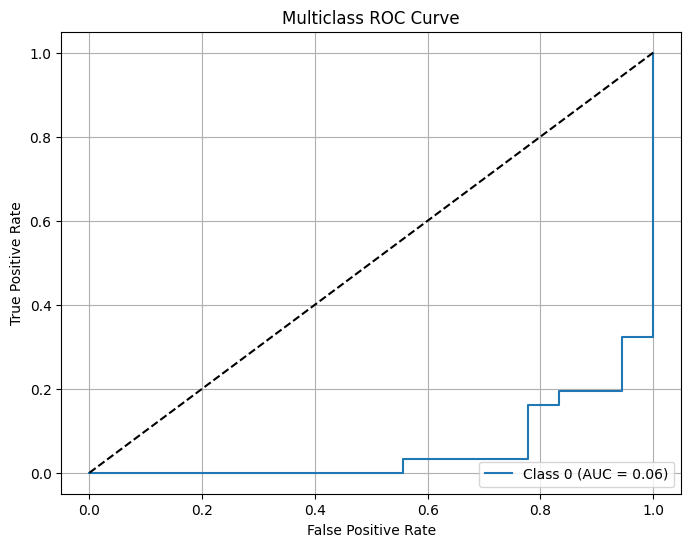

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340




Test size 40


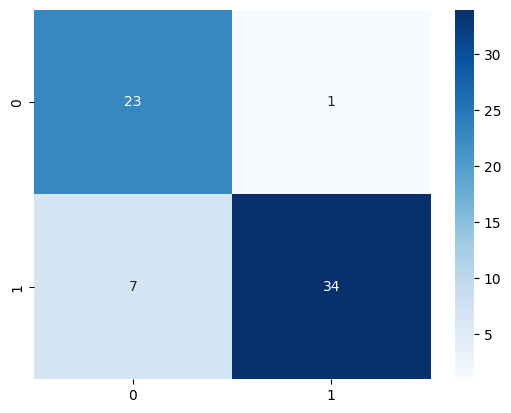

accuracy_score 0.8769230769230769
precision_score 0.8690476190476191
recall_score 0.8938008130081301
f1_score 0.8732943469785575


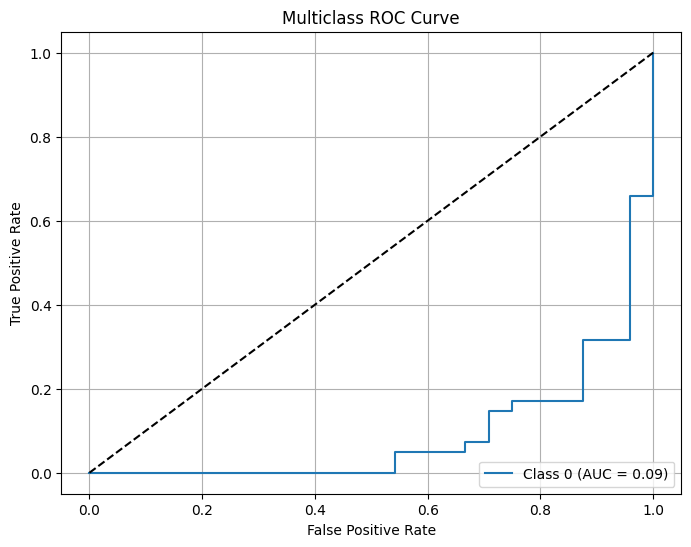

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340




Test size 50


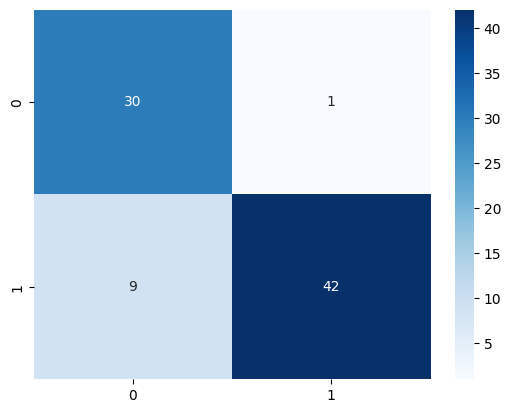

accuracy_score 0.8780487804878049
precision_score 0.8729874776386404
recall_score 0.8956356736242884
f1_score 0.8753799392097263


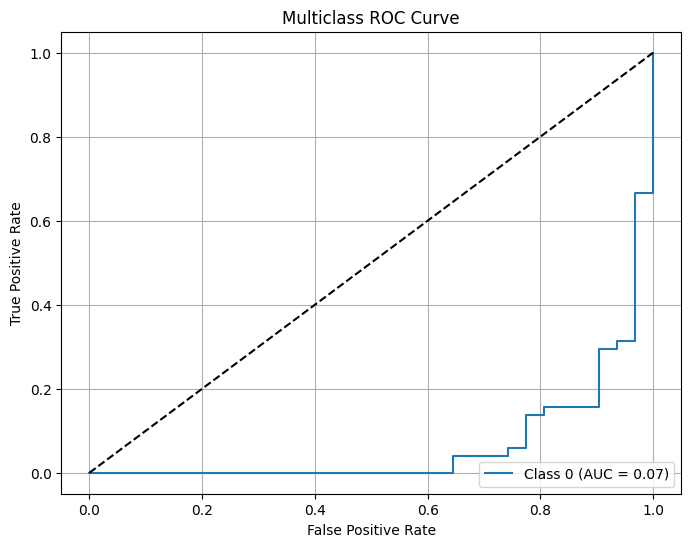

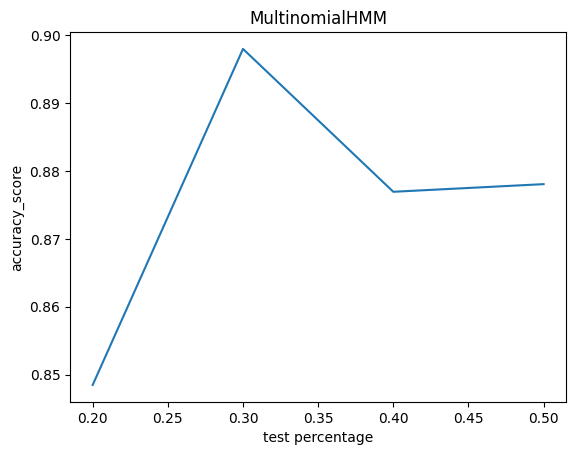

In [ ]:
testsize=[];
acc_score=[];
for i in range (2,6):
  solvemultinomilhmmbreastcancer(i*10,X,y,testsize,acc_score)

plt.plot(testsize,acc_score);
plt.title('MultinomialHMM');
plt.xlabel('test percentage');
plt.ylabel('accuracy_score');

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()


x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    # 1st convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # 2nd convolutional block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0–9
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=1024,
    validation_data=(x_test, y_test)
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 52s 847ms/step - accuracy: 0.5267 - loss: 1.4666 - val_accuracy: 0.9374 - val_loss: 0.2195
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 51s 847ms/step - accuracy: 0.8998 - loss: 0.3396 - val_accuracy: 0.9652 - val_loss: 0.1178
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 79s 811ms/step - accuracy: 0.9361 - loss: 0.2176 - val_accuracy: 0.9751 - val_loss: 0.0887
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 48s 819ms/step - accuracy: 0.9506 - loss: 0.1683 - val_accuracy: 0.9810 - val_loss: 0.0658
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 47s 806ms/step - accuracy: 0.9620 - loss: 0.1381 - val_accuracy: 0.9837 - val_loss: 0.0537
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9795 - loss: 0.0641
Test accuracy: 0.9837


In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model = models.Sequential([
    # 1️ Convolutional Block 1
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # 2️ Convolutional Block 2
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # 3️ Convolutional Block 3
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # 4️ Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Summary
model.summary()

# Train model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 491s 616ms/step - accuracy: 0.3535 - loss: 1.9893 - val_accuracy: 0.5467 - val_loss: 1.2712
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 480s 614ms/step - accuracy: 0.6075 - loss: 1.1055 - val_accuracy: 0.6394 - val_loss: 1.0158
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 480s 615ms/step - accuracy: 0.6921 - loss: 0.8855 - val_accuracy: 0.7369 - val_loss: 0.7779
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 494s 604ms/step - accuracy: 0.7311 - loss: 0.7766 - val_accuracy: 0.7595 - val_loss: 0.6942
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 506s 609ms/step - accuracy: 0.7674 - loss: 0.6796 - val_accuracy: 0.7816 - val_loss: 0.6308
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 470s 600ms/step - accuracy: 0.7845 - loss: 0.6240 - val_accuracy: 0.7862 - val_loss: 0.6188
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 509s 610ms/step - accuracy: 0.8082 - loss: 0.5638 - val_accuracy: 0.7878 - val_loss: 0.6287
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 493s 631ms/step - accuracy: 0.8176 -

## **Comparison of different models for cifar-10 dataset**

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn_history = cnn.fit(x_train, y_train, epochs=10,
                      validation_data=(x_val, y_val), batch_size=16)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 71s 28ms/step - accuracy: 0.3365 - loss: 1.7688 - val_accuracy: 0.5376 - val_loss: 1.2708
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 74s 30ms/step - accuracy: 0.5600 - loss: 1.2234 - val_accuracy: 0.5984 - val_loss: 1.1438
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 69s 28ms/step - accuracy: 0.6353 - loss: 1.0333 - val_accuracy: 0.6546 - val_loss: 0.9767
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.6822 - loss: 0.8949 - val_accuracy: 0.6747 - val_loss: 0.9232
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.7109 - loss: 0.8243 - val_accuracy: 0.6602 - val_loss: 0.9917
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 73s 29ms/step - accuracy: 0.7309 - loss: 0.7605 - val_accuracy: 0.6812 - val_loss: 0.9279
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.7585 - loss: 0.6863 - val_accuracy: 0.6766 - val_loss: 0.9417
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 70s 28ms/step - accuracy: 0.7659 -

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
# from tensorflow.keras.applications import VGG16
base_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
for layer in base_vgg.layers:
  layer.trainable = False

vgg = models.Sequential([
    base_vgg,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])
vgg.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
vgg_history = vgg.fit(x_train, y_train, epochs=5,
                      validation_data=(x_val, y_val), batch_size=64)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 693s 1s/step - accuracy: 0.4493 - loss: 1.5802 - val_accuracy: 0.5530 - val_loss: 1.2615
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 688s 1s/step - accuracy: 0.5768 - loss: 1.2106 - val_accuracy: 0.5795 - val_loss: 1.1936
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 698s 1s/step - accuracy: 0.6007 - loss: 1.1428 - val_accuracy: 0.5921 - val_loss: 1.1700
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 736s 1s/step - accuracy: 0.6187 - loss: 1.1004 - val_accuracy: 0.6054 - val_loss: 1.1382
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 740s 1s/step - accuracy: 0.6316 - loss: 1.0528 - val_accuracy: 0.6024 - val_loss: 1.1448


In [ ]:
alexnet = models.Sequential([
    layers.Conv2D(96, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])
alexnet.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
alexnet_history = alexnet.fit(x_train, y_train, epochs=8,
                              validation_data=(x_val, y_val), batch_size=64)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 374s 596ms/step - accuracy: 0.3840 - loss: 1.6943 - val_accuracy: 0.5852 - val_loss: 1.1850
Epoch 2/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 378s 590ms/step - accuracy: 0.6222 - loss: 1.0805 - val_accuracy: 0.6506 - val_loss: 1.0120
Epoch 3/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 369s 590ms/step - accuracy: 0.6961 - loss: 0.8741 - val_accuracy: 0.6820 - val_loss: 0.9054
Epoch 4/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 352s 563ms/step - accuracy: 0.7411 - loss: 0.7412 - val_accuracy: 0.6903 - val_loss: 0.8888
Epoch 5/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 349s 559ms/step - accuracy: 0.7867 - loss: 0.6056 - val_accuracy: 0.7097 - val_loss: 0.8708
Epoch 6/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 402s 590ms/step - accuracy: 0.8346 - loss: 0.4709 - val_accuracy: 0.7061 - val_loss: 0.8922
Epoch 7/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 368s 588ms/step - accuracy: 0.8827 - loss: 0.3414 - val_accuracy: 0.7143 - val_loss: 0.9466
Epoch 8/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 379s 584ms/step - accuracy: 0.9212 - loss: 0

In [ ]:
from tensorflow.keras.applications import  InceptionV3

In [ ]:
base_incep = InceptionV3(weights='imagenet', include_top=False, input_shape=(75,75,3))
for layer in base_incep.layers: layer.trainable = False

x_train_resized = tf.image.resize(x_train, (75,75))
x_val_resized   = tf.image.resize(x_val, (75,75))
x_test_resized  = tf.image.resize(x_test, (75,75))

googlenet = models.Sequential([
    base_incep,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])
googlenet.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
googlenet_history = googlenet.fit(x_train_resized, y_train, epochs=5,
                                  validation_data=(x_val_resized, y_val),
                                  batch_size=64)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 565s 889ms/step - accuracy: 0.5107 - loss: 1.4097 - val_accuracy: 0.6113 - val_loss: 1.1280
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 520s 821ms/step - accuracy: 0.6544 - loss: 0.9839 - val_accuracy: 0.6239 - val_loss: 1.0936
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 557s 814ms/step - accuracy: 0.7071 - loss: 0.8391 - val_accuracy: 0.6257 - val_loss: 1.0942
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 601s 877ms/step - accuracy: 0.7574 - loss: 0.7053 - val_accuracy: 0.6274 - val_loss: 1.1370
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 523s 815ms/step - accuracy: 0.8081 - loss: 0.5630 - val_accuracy: 0.6242 - val_loss: 1.1797


313/313 ━━━━━━━━━━━━━━━━━━━━ 115s 359ms/step


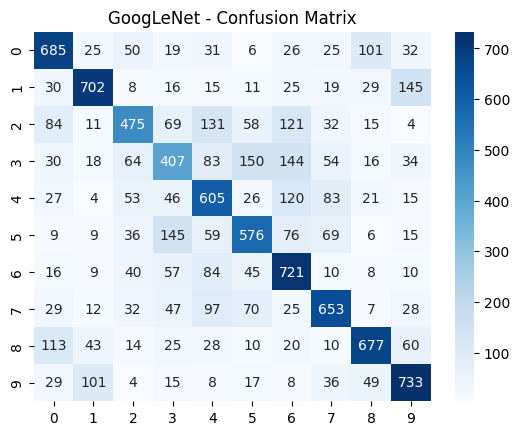

313/313 ━━━━━━━━━━━━━━━━━━━━ 106s 339ms/step


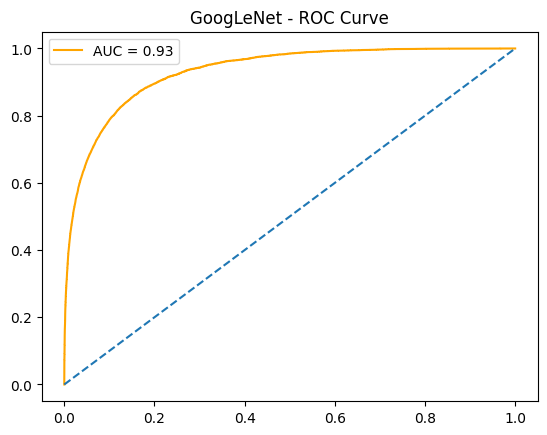

In [ ]:
import seaborn as sns
def evaluate_model(model, x_t, y_t, title):
    y_pred = np.argmax(model.predict(x_t), axis=1)
    y_true = y_t.flatten()

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{title} - Confusion Matrix")
    plt.show()

    # ROC Curve (macro)
    y_prob = model.predict(x_t)
    y_true_bin = tf.keras.utils.to_categorical(y_true, num_classes=10)
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='orange', label=f"AUC = {roc_auc:.2f}")
    plt.plot([0,1],[0,1], linestyle='--')
    plt.title(f"{title} - ROC Curve")
    plt.legend()
    plt.show()

    acc = model.evaluate(x_t, y_t, verbose=0)[1]
    return acc

# cnn_acc = evaluate_model(cnn, x_test, y_test, "CNN")
# vgg_acc = evaluate_model(vgg, x_test, y_test, "VGG16")
# alex_acc = evaluate_model(alexnet, x_test, y_test, "AlexNet")
goog_acc = evaluate_model(googlenet, x_test_resized, y_test, "GoogLeNet")

# **Accuracy and loss vs epochs**

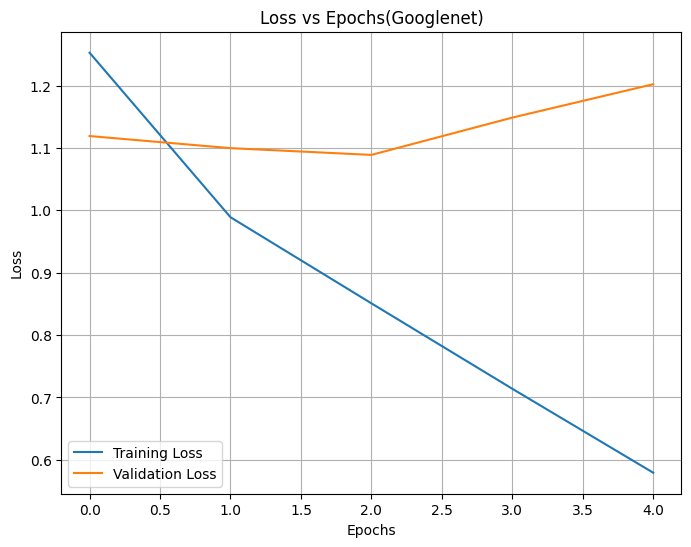

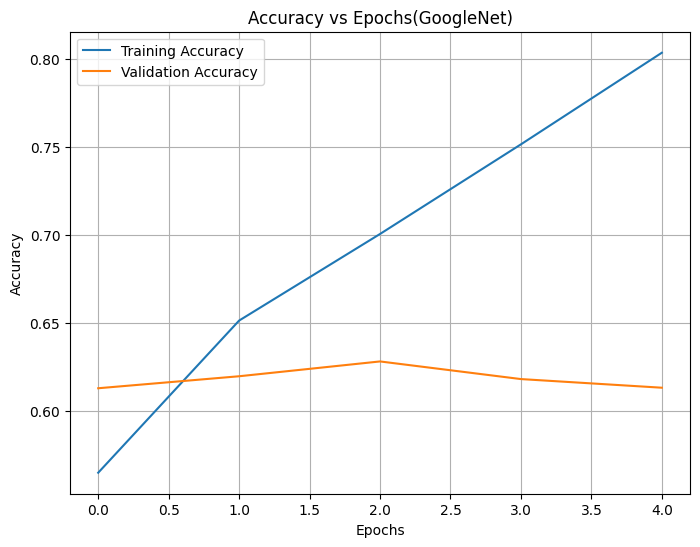

In [ ]:
import matplotlib.pyplot as plt

# Extract data from history
history = googlenet_history.history

# Plot Training & Validation Loss
plt.figure(figsize=(8,6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs(Googlenet)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(8,6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs(GoogleNet)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

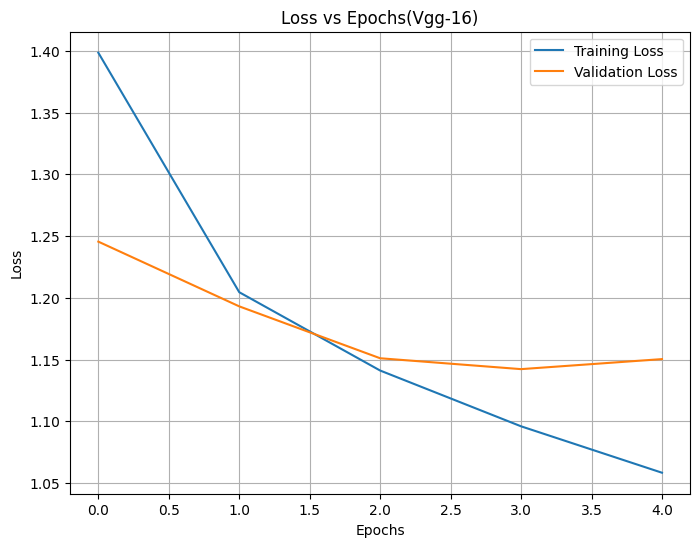

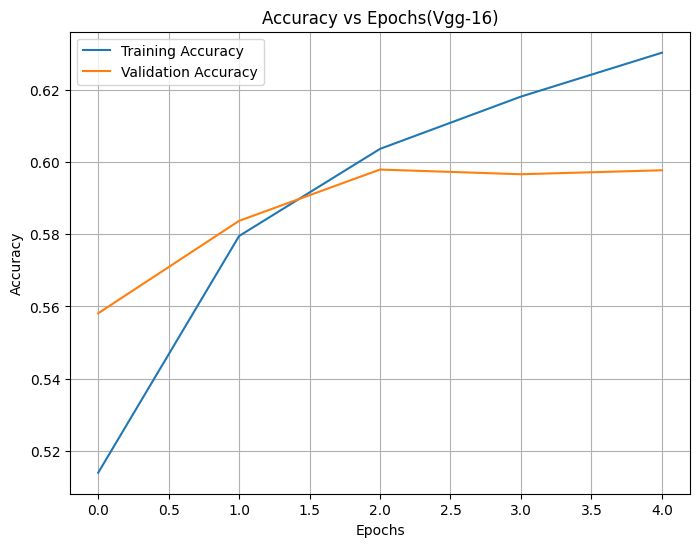

In [ ]:
import matplotlib.pyplot as plt

# Extract data from history
history = vgg_history.history

# Plot Training & Validation Loss
plt.figure(figsize=(8,6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs(Vgg-16)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(8,6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs(Vgg-16)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

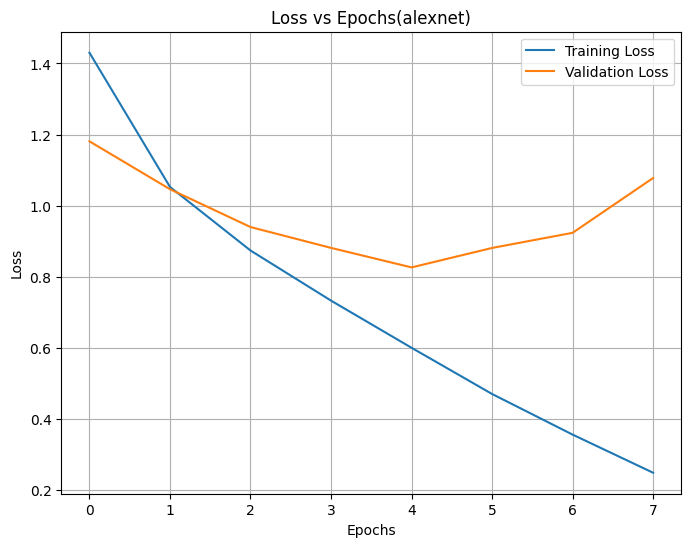

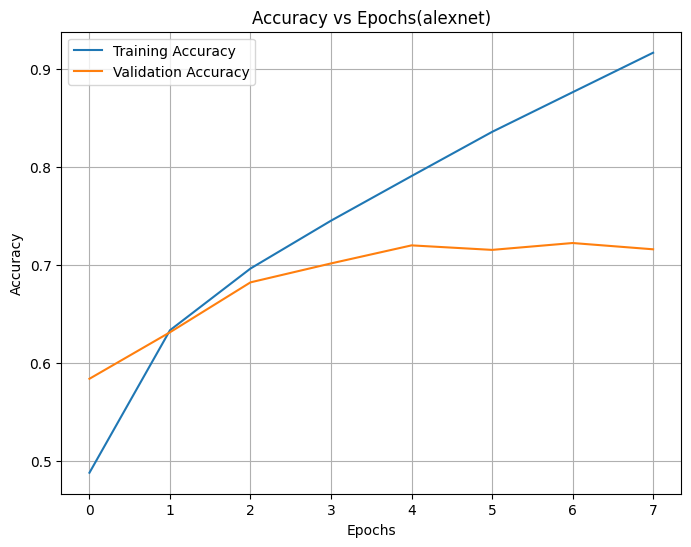

In [ ]:
import matplotlib.pyplot as plt

# Extract data from history
history = alexnet_history.history

# Plot Training & Validation Loss
plt.figure(figsize=(8,6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs(alexnet)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(8,6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs(alexnet)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

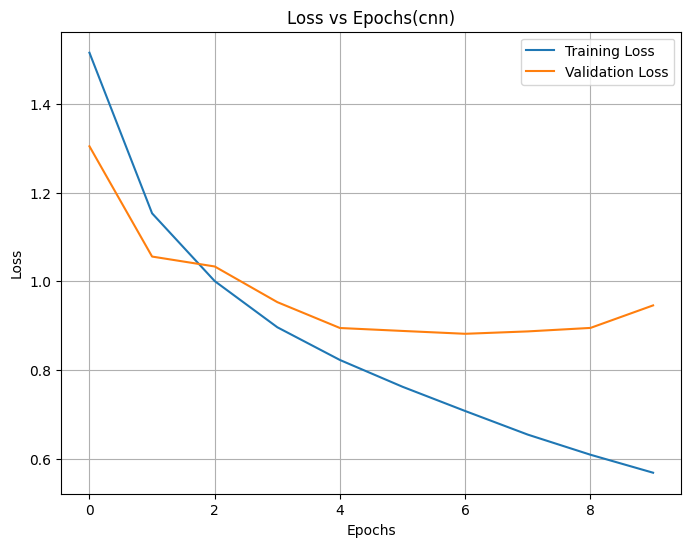

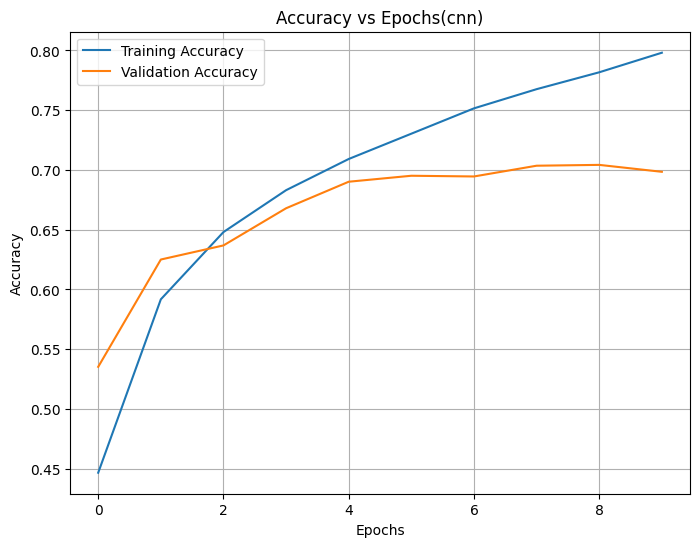

In [ ]:
import matplotlib.pyplot as plt

# Extract data from history
history = cnn_history.history

# Plot Training & Validation Loss
plt.figure(figsize=(8,6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs(cnn)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(8,6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs(cnn)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Comparison of 4 models for MNIST**

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# cnn_model.summary()

# Train
history_cnn = cnn_model.fit(x_train, y_train, epochs=8, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 54s 61ms/step - accuracy: 0.8952 - loss: 0.3687 - val_accuracy: 0.9815 - val_loss: 0.0662
Epoch 2/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.9835 - loss: 0.0513 - val_accuracy: 0.9872 - val_loss: 0.0412
Epoch 3/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 53s 63ms/step - accuracy: 0.9893 - loss: 0.0341 - val_accuracy: 0.9895 - val_loss: 0.0345
Epoch 4/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 61ms/step - accuracy: 0.9921 - loss: 0.0234 - val_accuracy: 0.9903 - val_loss: 0.0306
Epoch 5/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 60ms/step - accuracy: 0.9945 - loss: 0.0169 - val_accuracy: 0.9893 - val_loss: 0.0399
Epoch 6/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.9962 - loss: 0.0124 - val_accuracy: 0.9915 - val_loss: 0.0346
Epoch 7/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 61ms/step - accuracy: 0.9968 - loss: 0.0099 - val_accuracy: 0.9917 - val_loss: 0.0335
Epoch 8/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.9975 - loss: 0.0077 - val_accu

In [ ]:
# Resize and repeat grayscale channel to 3 channels for VGG16
x_train_vgg = np.repeat(x_train, 3, axis=-1)
x_test_vgg = np.repeat(x_test, 3, axis=-1)

# Resize to 32x32
x_train_vgg = tf.image.resize(x_train_vgg, (32,32))
x_test_vgg = tf.image.resize(x_test_vgg, (32,32))

In [ ]:
vgg_base = VGG16(weights=None, include_top=False, input_shape=(32,32,3))
for layer in vgg_base.layers:
    layer.trainable = False
vgg_model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# vgg_model.summary()

# Train
history_vgg = vgg_model.fit(x_train_vgg, y_train, epochs=5, batch_size=1024, validation_split=0.1, verbose=1)

Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 661s 12s/step - accuracy: 0.1125 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3001
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 661s 12s/step - accuracy: 0.1118 - loss: 2.2990 - val_accuracy: 0.1050 - val_loss: 2.2958
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 657s 12s/step - accuracy: 0.1169 - loss: 2.2932 - val_accuracy: 0.1148 - val_loss: 2.2857
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 675s 12s/step - accuracy: 0.1435 - loss: 2.2817 - val_accuracy: 0.1568 - val_loss: 2.2676
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 684s 12s/step - accuracy: 0.1652 - loss: 2.2630 - val_accuracy: 0.1848 - val_loss: 2.2412


In [ ]:
x_train_inc = tf.image.resize(x_train_vgg, (75,75))
x_test_inc = tf.image.resize(x_test_vgg, (75,75))


inc_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(75,75,3))
for layer in inc_base.layers:
    layer.trainable = False
inc_model = models.Sequential([
    inc_base,
    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

inc_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# inc_model.summary()

history_inc = inc_model.fit(x_train_inc, y_train, epochs=5, batch_size=1024, validation_split=0.1, verbose=1)

Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 670s 12s/step - accuracy: 0.6169 - loss: 1.1442 - val_accuracy: 0.8997 - val_loss: 0.3198
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 662s 12s/step - accuracy: 0.8842 - loss: 0.3663 - val_accuracy: 0.9278 - val_loss: 0.2344
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 648s 12s/step - accuracy: 0.9101 - loss: 0.2836 - val_accuracy: 0.9377 - val_loss: 0.2005
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 640s 12s/step - accuracy: 0.9233 - loss: 0.2409 - val_accuracy: 0.9415 - val_loss: 0.1821
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 702s 13s/step - accuracy: 0.9319 - loss: 0.2123 - val_accuracy: 0.9475 - val_loss: 0.1680


In [ ]:
# x_train_alex = tf.image.resize(x_train_vgg, (75,75))
# x_test_alex = tf.image.resize(x_test_vgg, (75,75))


# inc_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(75,75,3))
# for layer in inc_base.layers:
#     layer.trainable = False
alex = models.Sequential([
    layers.Conv2D(96, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

alex.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# inc_model.summary()

history_alex = alex.fit(x_train_vgg, y_train, epochs=5, batch_size=1024, validation_split=0.1, verbose=1)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 407s 8s/step - accuracy: 0.7251 - loss: 0.7925 - val_accuracy: 0.9798 - val_loss: 0.0677
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 439s 8s/step - accuracy: 0.9804 - loss: 0.0643 - val_accuracy: 0.9863 - val_loss: 0.0562
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 403s 8s/step - accuracy: 0.9878 - loss: 0.0409 - val_accuracy: 0.9893 - val_loss: 0.0391
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 440s 8s/step - accuracy: 0.9914 - loss: 0.0274 - val_accuracy: 0.9897 - val_loss: 0.0393
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 443s 8s/step - accuracy: 0.9949 - loss: 0.0182 - val_accuracy: 0.9902 - val_loss: 0.0368


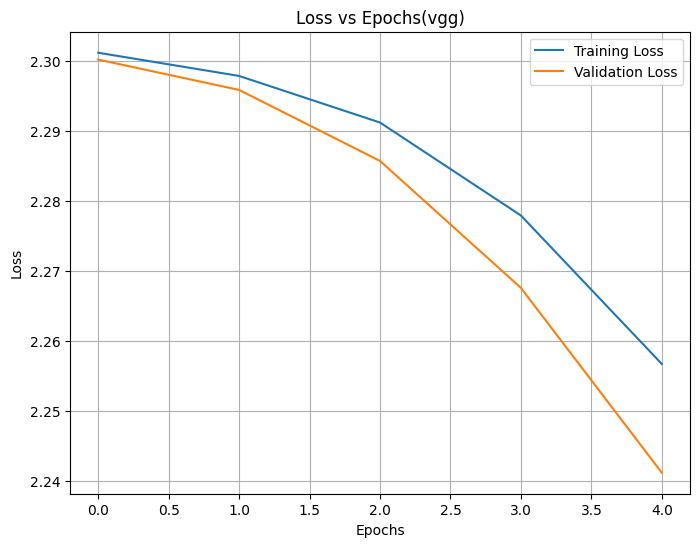

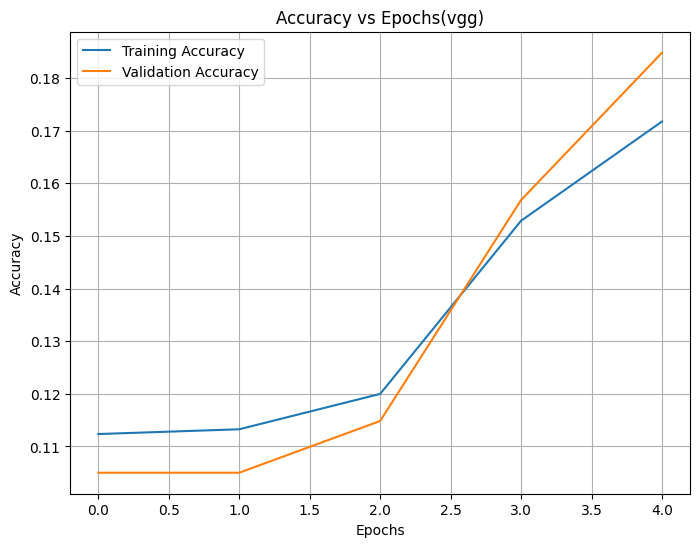

In [ ]:
import matplotlib.pyplot as plt

# Extract data from history
history = history_vgg.history

# Plot Training & Validation Loss
plt.figure(figsize=(8,6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs(vgg)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(8,6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs(vgg)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns
def evaluate_model_cipar(model, x_t, y_t, title):
    y_pred_prob = model.predict(x_t)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Ensure y_t is in the correct shape for confusion matrix and ROC
    if y_t.shape[-1] > 1: # Check if already one-hot encoded
        y_true = np.argmax(y_t, axis=1)
    else:
        y_true = y_t.flatten()

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{title} - Confusion Matrix")
    plt.show()

    # ROC Curve (macro)
    if y_t.shape[-1] <= 1: # If not one-hot encoded, convert for ROC
        y_true_bin = tf.keras.utils.to_categorical(y_true, num_classes=model.output_shape[-1])
    else:
        y_true_bin = y_t

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    plt.figure(figsize=(8, 6))
    n_classes = y_true_bin.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # random line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{title} - Multiclass ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


    acc = model.evaluate(x_t, y_t, verbose=0)[1]
    return acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 350ms/step


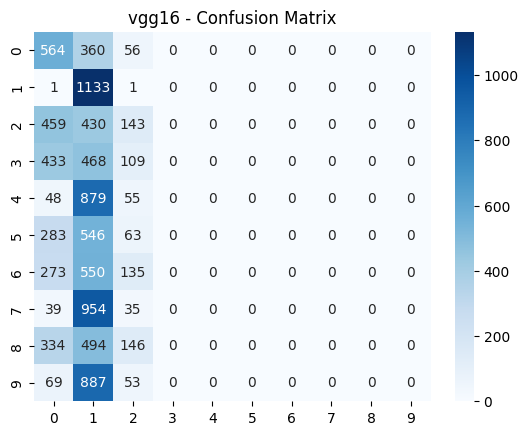

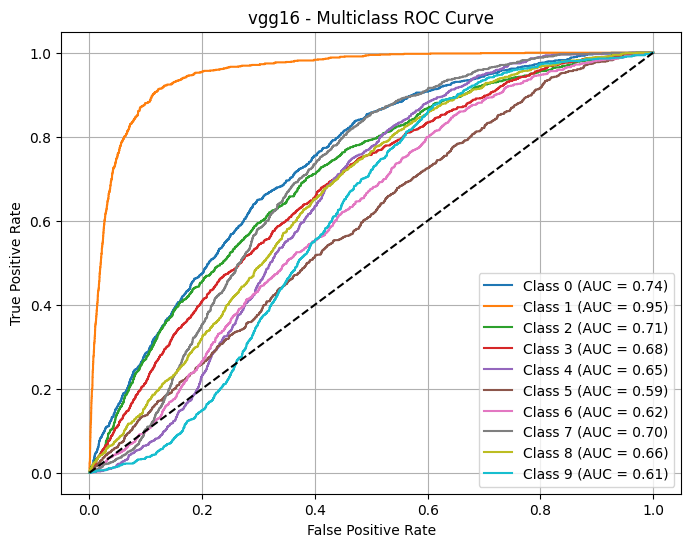

In [ ]:
# Resize and repeat grayscale channel to 3 channels for InceptionV3
x_test_inc = np.repeat(x_test, 3, axis=-1)
x_test_inc = tf.image.resize(x_test_inc, (32,32))

inc_ = evaluate_model_cipar(vgg_model, x_test_inc, y_test, "vgg16")